# Breast Cancer Wisconsin (Diagnostic) EDA

## Carga del Dataset

### Importar el Dataset

In [1]:
# Carga de las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos
df = pd.read_csv("../data/dataset.csv") 


### Revisión de dimensiones y primeras filas

In [2]:
# El dataset tiene 569 filas y 33 columnas.
df.shape

(569, 33)

In [3]:
# Muestra la estructura del DataFrame, una columna id, un objeto diagnostico y 30 columnas numéricas con características del tumor.
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Inspección de los tipos de datos

In [4]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

La mayoría de las columnas numéricas son de tipo float64, excepto la columna 'id' que es de tipo int64.
La columna 'diagnosis' es de tipo object y contiene valores categóricos 'M' (maligno) y 'B' (benigno). Esta colunmna debería ser convertida a un tipo categórico para un análisis más eficiente.
La columna Unnamed: 32 tiene todos sus valores nulos y puede ser eliminada del DataFrame.

## Exploración del Dataset

### Valores nulos

In [5]:
# Conteo de valores nulos por columna.
df.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Todas las columnas numéricas no tienen valores nulos, excepto la columna 'Unnamed: 32' que tiene 569 valores nulos. Esta columna puede ser eliminada del DataFrame.

### Duplicados

In [6]:
# Verifica si existen filas duplicadas

'''Este dataset no contiene filas duplicadas.'''
df.duplicated().sum()

0

### Rango de variables

In [7]:
# Comprobación general de incoherencias en tipos y columnas
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


El rango de los valores en las columnas numéricas varía significativamente. Algunas características tienen valores muy pequeños (cercanos a 0), 
mientras que otras tienen valores mucho más grandes (hasta varios miles). Esto sugiere que podría ser beneficioso normalizar o estandarizar 
estas características antes de aplicar algoritmos de machine learning que son sensibles a la escala de los datos.

### Incoherencias

In [8]:
# Comprobación general de incoherencias en tipos y columnas
df.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

La mayoría de las columnas numéricas son de tipo float64,  la columna 'id' que es de tipo int64, la columna diagnosis es un object que se convertirá en categoría.
La columna 'Unnamed: 32' tiene todos sus valores nulos y será eliminada del DataFrame.
En este dataset no se observan incoherencias evidentes en los tipos de datos de las columnas.

### Distribución inicial de las columnas

#### Columnas numéricas

In [ ]:
# Selección de columnas numéricas
numericas = df.select_dtypes(include=["int64", "float64"])
# Estadísticas descriptivas de las columnas numéricas
display(numericas.describe().T)

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Las variables numéricas muestran rangos muy amplios, con diferencias claras entre valores mínimos y máximos.
En general, las distribuciones están sesgadas hacia la derecha, lo que es típico en medidas biométricas: la mayoría de los tumores son pequeños, pero existen algunos casos con valores muy altos, visibles en los histogramas.

#### Histograma

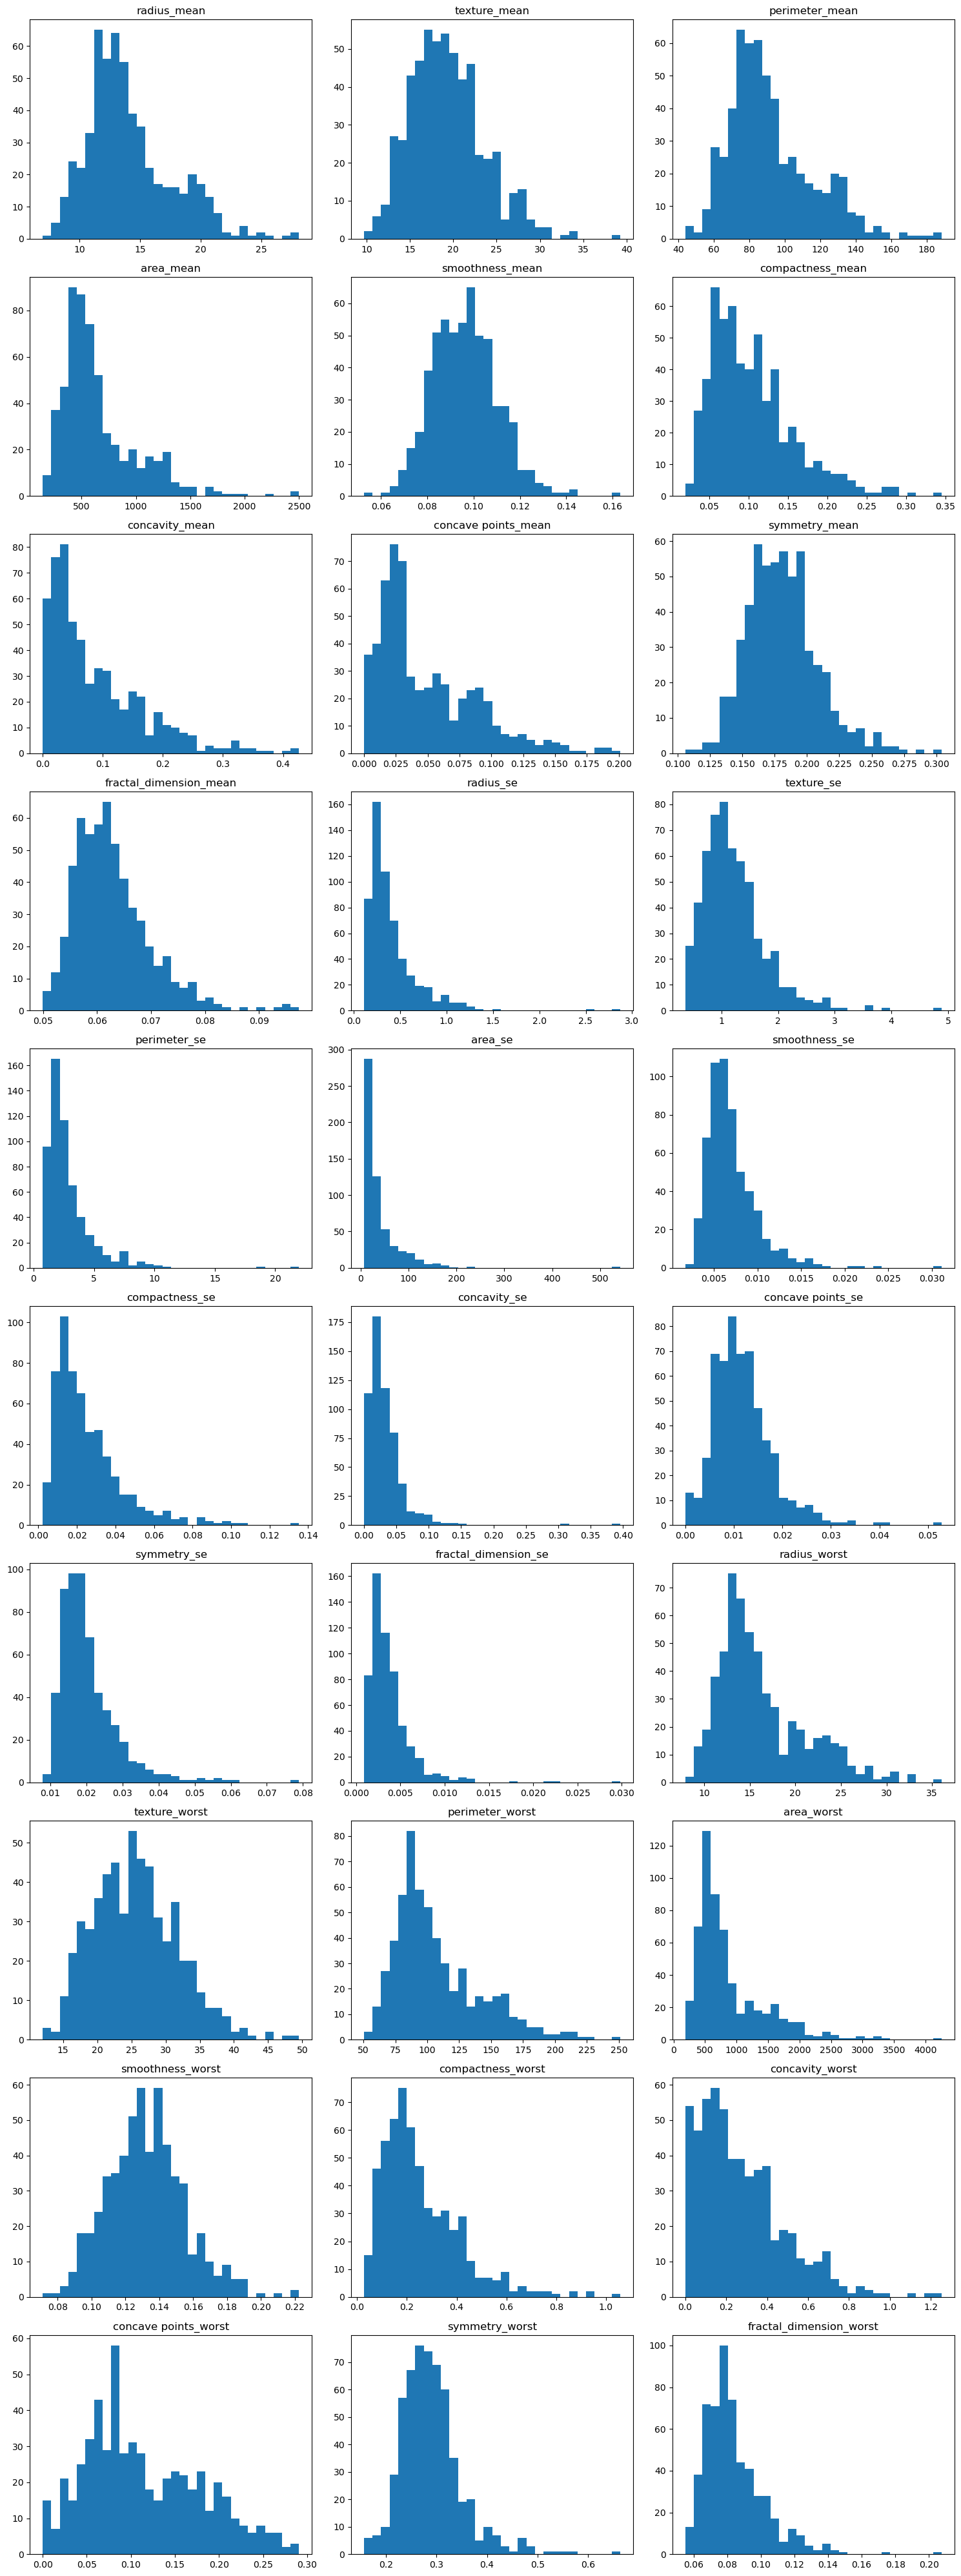

In [26]:
columnas = numericas.columns
n = len(columnas)

# 3 gráficos por fila
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(columnas, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()

Esta visualización permite observar la distribución inicial de todas las variables numéricas del dataset de forma rápida y comparativa.
Con ello se identifican patrones generales, sesgos, rangos de valores y outliers.

#### Rangos

In [24]:
rangos = pd.DataFrame({
    "min": numericas.min(),
    "max": numericas.max(),
    "rango": numericas.max() - numericas.min()
})
display(rangos)


,min,max,rango
radius_mean,6.981000,28.11000,21.129000
texture_mean,9.710000,39.28000,29.570000
perimeter_mean,43.790000,188.50000,144.710000
area_mean,143.500000,2501.00000,2357.500000
smoothness_mean,0.052630,0.16340,0.110770
compactness_mean,0.019380,0.34540,0.326020
concavity_mean,0.000000,0.42680,0.426800
concave points_mean,0.000000,0.20120,0.201200
symmetry_mean,0.106000,0.30400,0.198000
fractal_dimension_mean,0.049960,0.09744,0.047480


Se identifican varias variables muestran posibles outliers.


#### Distribución de columnas categoricas

In [10]:
df['diagnosis'].value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

La columna `diagnosis` presenta dos categorías: Benigno (B) y Maligno (M). La clase mayoritaria es la benigna,
aunque la maligna está bien representada. No hay categorías inesperadas.

## Limpieza y normalización

### Correción de tipos

In [11]:
# Convertir 'diagnosis' a tipo categórico
df['diagnosis'] = df['diagnosis'].astype('category')


La columna 'diagnosis' contiene etiquetas ("M" y "B") por lo que ha sido convertida a tipo categórico.

In [12]:
'''La columna 'id' ha sido convertida a tipo string.'''
df['id'] = df['id'].astype(str)


La columna ID no aporta información analítica ya que es un identificador, se puede eliminar o conservarla.
En este caso he decidido conservarla.

### Tratamiento de valores nulos

In [13]:
df.drop(columns=['Unnamed: 32'], inplace=True)

La columna Unnamed:32 contiene 569 valores nulos, esta vacía, por lo que ha sido eliminada ya que no aporta nada.

### Eliminación o tratamiento de duplicados

In [14]:
df.duplicated().sum()

0

El resultado es 0 por lo que este Dataset no contiene filas duplicadas. No hay que hacer ningún tratamiento.

### Normalización de categorias y fechas

Anteriormente ya se normalizó la categoria diagnosis pasandola a tipo category

Este dataset no contiene fechas.

### Verificar los datos

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    object  
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

Tras la limpieza el Dataframe queda con:

* 32 Columnas
* Tipos correctos (ID -> convertido str y diagnosis -> convertido a category)
* Sin valores nulos o duplicados

## Visualizaciones básicas

## Histograma

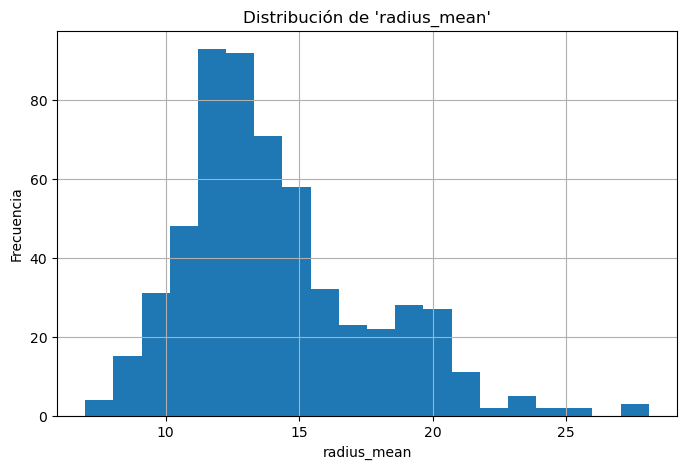

In [16]:
plt.figure(figsize=(8,5))
df['radius_mean'].hist(bins=20)
plt.title("Distribución de 'radius_mean'")
plt.xlabel("radius_mean")
plt.ylabel("Frecuencia")
plt.show()

Este gráfico muestra la variable que representa el tamaño del tumor.
El grafico presenta una distribución asimetrica, con presencia de valores altos que podrían ser outlier, aunque esto es normal en datos biomédicos.

Mas histogramas se pueden ver en los puntos anteriores a este, solo que esos no estan limpios.

### Gráfica de barras

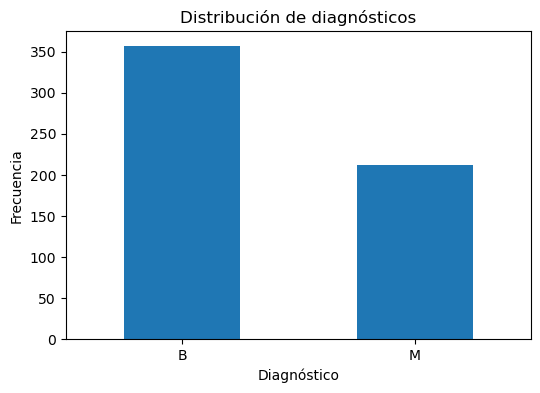

In [17]:
plt.figure(figsize=(6,4))
df['diagnosis'].value_counts().plot(kind='bar')
plt.title("Distribución de diagnósticos")
plt.xlabel("Diagnóstico")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()


La clase “Benigno” aparece con mayor frecuencia (357 casos), mientras que “Maligno” tiene 212 casos.
El dataset está desbalanceado, algo habitual en problemas médicos donde los casos malignos son menos frecuentes.

### Visualización adicional - Heatmap de correlación

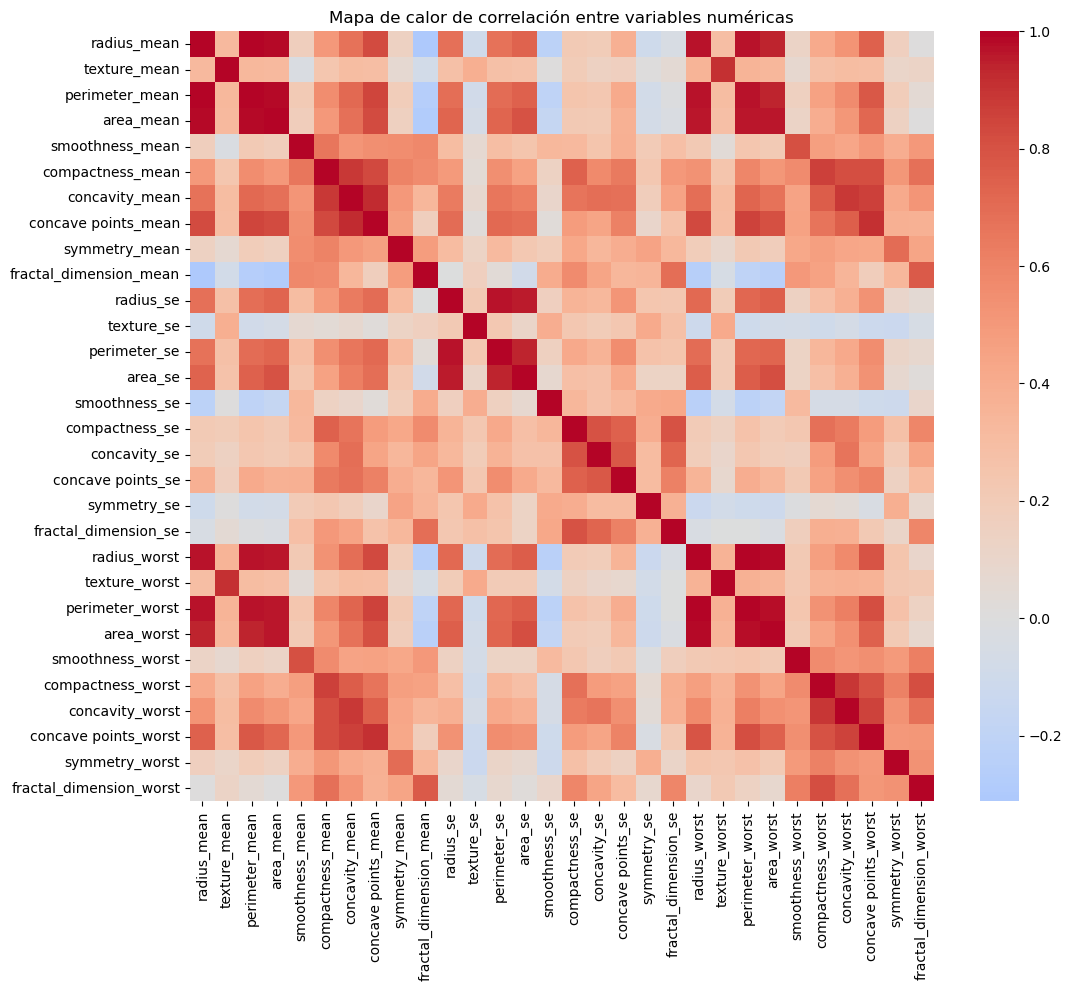

In [18]:
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlación entre variables numéricas")
plt.show()

Esta gráfica permite ver qué variables están mas relacionadas con el diagnóstico o entre ellas.

Se observan bloques de variables altamente correlacionadas, especialmente en métricas relacionadas con el tamaño del tumor:

* radius
* perimeter
* area

Las variables “worst” tienden a tener correlaciones más fuertes, lo cual es consistente con la literatura médica: las peores medidas del tumor suelen ser más representativas en el diagnóstico

### Conclusiones exploratorias

Tras realizar el análisis exploratorio del Breast Cancer Wisconsin (Diagnostic) Dataset, puedo extraer varias conclusiones importantes tanto sobre la estructura de los datos como sobre la calidad y comportamiento de las variables.

#### Resumen de las características

El dataset contiene 569 registros y 32 columnas tras la limpieza.
Incluye:
* Una variable objetivo (diagnosis), categórica con valores Benigno (B) y Maligno (M).
* 30 variables numéricas que describen características físicas de los núcleos celulares (tamaño, textura, simetría, concavidad…).
* Un identificador (id), que no aporta información analítica pero podría ser útil para otros estudios.
* No existen columnas de fecha ni texto libre.

Los datos provienen de un repositorio biomédico fiable [(UCI Machine Learning Repository on Kaggle)](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data)

#### Hallazgos

* El dataset está desbalanceado, con más casos benignos que malignos y con variables numéricos con rangos amplios y distribuciones asimétricas, algo normal en estudios medicos.
* Se observan posibles outliers en algunas características relacionadas con el tamaño del tumor, especialmente en las versiones “worst”.
* El heatmap muestra que las variables relacionadas con radius, perimeter y area están fuertemente correlacionadas entre sí, lo cual tiene sentido clínico ya que todas miden aspectos del tamaño del tumor.
* Las variables con sufijo _worst suelen tener correlaciones más altas, siendo potencialmente más informativas para diferenciar entre tumores benignos y malignos.

#### Cambios aplicados durante la limpieza

* Se eliminó la columna Unnamed: 32, ya que contenía únicamente valores nulos.

* Convertí la variable diagnosis al tipo category para mejorar claridad y eficiencia.

* Revisé que no existieran filas duplicadas (resultado = 0).

* Verifiqué la ausencia de valores nulos en el resto del dataset.

* Con respecto al identificador (id), decidí mantenerlo aunque no influye en el análisis.